In [1]:
import numpy as np
from os import path
import os
np.random.seed(12345)
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from rdkit.Chem import Draw
import rdkit
from rdkit.Chem import rdMolDescriptors as rdmd
from rdkit import DataStructs

In [2]:
def splitby_char(word):
    return [char for char in word]

In [3]:
#Assign each of the 39 amino acids a fingerprint by
#1) Retrieve the SMILES Isomeric CODE for each amino acid (from PubChem), 
#2) then make fingerprints for each using RDKIT.
AAs_smileorder=[]
AAs_smileorder=['G','V','v','A','a','N','n','S','s','R','r','D','d','F','f','M','m','H','h',\
                'I','i','L','l','K','k','T','t','W','w','C','c','Q','q','P','p','Y','y','E','e']
SMILES = []
aa_fingerprint = []

SMILES.append('C(C(=O)O)N') # Glycine
SMILES.append('CC(C)[C@@H](C(=O)O)N') # L Valine
SMILES.append('CC(C)[C@H](C(=O)O)N') # D Valine
SMILES.append('C[C@@H](C(=O)O)N') # L Alanine
SMILES.append('C[C@H](C(=O)O)N') # D Alanine
SMILES.append('C([C@@H](C(=O)O)N)C(=O)N') # L Asparagine
SMILES.append('C([C@H](C(=O)O)N)C(=O)N') # D Asparagine
SMILES.append('C([C@@H](C(=O)O)N)O') # L Serine
SMILES.append('C([C@H](C(=O)O)N)O') # D Serine
SMILES.append('C(C[C@@H](C(=O)O)N)C[NH+]=C(N)N') # L Arginine
SMILES.append('C(C[C@H](C(=O)O)N)C[NH+]=C(N)N') # D Arginine
SMILES.append('C([C@@H](C(=O)O)N)C(=O)[O-]') # L Aspartic Acid
SMILES.append('C([C@H](C(=O)O)N)C(=O)[O-]') # D Aspartic Acid
SMILES.append('C1=CC=C(C=C1)C[C@@H](C(=O)O)N') # L Phenylalanine
SMILES.append('C1=CC=C(C=C1)C[C@H](C(=O)O)N') # D Phenylalanine
SMILES.append('CSCC[C@@H](C(=O)O)N') #L Methionine
SMILES.append('CSCC[C@H](C(=O)O)N') #D Methionine
SMILES.append('C1=C(NC=N1)C[C@@H](C(=O)O)N') #L Histidine
SMILES.append('C1=C(NC=N1)C[C@H](C(=O)O)N') #D Histidine
SMILES.append('CC[C@H](C)[C@@H](C(=O)O)N') #L Isoleucine
SMILES.append('CC[C@@H](C)[C@H](C(=O)O)N') #D Isoleucine
SMILES.append('CC(C)C[C@@H](C(=O)O)N') #L Leucine
SMILES.append('CC(C)C[C@H](C(=O)O)N') #D Leucine
SMILES.append('C(CC[NH3+])C[C@@H](C(=O)O)N') #L Lysine
SMILES.append('C(CC[NH3+])C[C@H](C(=O)O)N') #D Lysine
SMILES.append('C[C@H]([C@@H](C(=O)O)N)O') #L Threonine
SMILES.append('C[C@@H]([C@H](C(=O)O)N)O') #D Threonine
SMILES.append('C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N') #L Tryptophan
SMILES.append('C1=CC=C2C(=C1)C(=CN2)C[C@H](C(=O)O)N') #D Tryptophan
SMILES.append('C([C@@H](C(=O)O)N)S') #L Cysteine
SMILES.append('C([C@H](C(=O)O)N)S') #D Cysteine
SMILES.append('C(CC(=O)N)[C@@H](C(=O)O)N') #L Glutamine
SMILES.append('C(CC(=O)N)[C@H](C(=O)O)N') #D Glutamine
SMILES.append('C1C[C@H](NC1)C(=O)O') #L Proline
SMILES.append('C1C[C@@H](NC1)C(=O)O') #D Proline
SMILES.append('C1=CC(=CC=C1C[C@@H](C(=O)O)N)O') #L Tyrosine
SMILES.append('C1=CC(=CC=C1C[C@H](C(=O)O)N)O') #D Tyrosine
SMILES.append('C(CC(=O)[O-])[C@@H](C(=O)O)N') #L Glutamic Acid
SMILES.append('C(CC(=O)[O-])[C@H](C(=O)O)N') #D Glutamic Acid


#Store bit info here, which we can use to trace back the observed substructures
bi = {}
for code in SMILES:
    bi[code] = {}

for code in SMILES:
    mol = Chem.MolFromSmiles(code)
    fp = Chem.GetMorganFingerprintAsBitVect(mol, useChirality=True, radius=3, nBits = 2048, bitInfo=bi[code])
    vector = np.array(fp)
    aa_fingerprint.append(vector)

#Create AA dictionary
AA_dict=dict()
for i in range(len(AAs_smileorder)):
    AA_dict[AAs_smileorder[i]]=np.array(aa_fingerprint[i])
    
print(len(AA_dict))

39


In [4]:
#Store the keys in a list, then into an array which will be N_amino acids by 2048 (bc 2048-bit vector)
AA_names=list(AA_dict.keys())

X=np.array(list(AA_dict.values()))
print(np.shape(X))

(39, 2048)


In [5]:
train_df_X = pd.DataFrame(X)
train_df_X.index = AA_names

In [6]:
#Calculate similairty matrix (but only lower triangle because it's symmetric)
from collections import Counter
sim_list = []
for i,seq in enumerate(AA_names):
    #print(i)
    seq_sim = []
    for j in range(0, len(train_df_X)):
        if (i < j):
            seq_sim.append(0)
        elif seq == train_df_X.index[j]:
            seq_sim.append(1)
        else:
            a = np.array(train_df_X.loc[seq,:])
            b = np.array(train_df_X.iloc[j,:])
            c = (a+b)//2
            seq_sim.append(c.sum()/(a.sum()+b.sum()-c.sum()))
    sim_list.append(seq_sim)

In [7]:
X = np.array(sim_list) + np.array(sim_list).T - np.diag(np.diag(np.array(sim_list)))
print(X)

[[1.         0.25       0.25       ... 0.17647059 0.22222222 0.22222222]
 [0.25       1.         0.57894737 ... 0.21621622 0.26666667 0.26666667]
 [0.25       0.57894737 1.         ... 0.21621622 0.26666667 0.26666667]
 ...
 [0.17647059 0.21621622 0.21621622 ... 1.         0.23255814 0.29268293]
 [0.22222222 0.26666667 0.26666667 ... 0.23255814 1.         0.53333333]
 [0.22222222 0.26666667 0.26666667 ... 0.29268293 0.53333333 1.        ]]


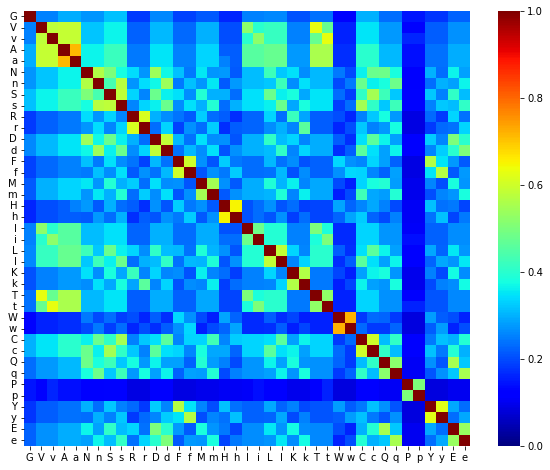

In [8]:
import seaborn as sns
plt.figure(figsize=(10,8))

x_axis_labels = AA_names
y_axis_labels = AA_names
ax=sns.heatmap(X, vmin=0, vmax=1,annot=False,xticklabels=x_axis_labels, yticklabels=y_axis_labels,\
              cmap="jet")
plt.yticks(rotation=0)
plt.show()
